In [36]:
!pip install pandas scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
df = pd.read_csv('Tallas.csv')

display(df)

,ID_Usuario,Tipo_Prenda,Marca,Medida_Pecho_cm,Medida_Cintura_cm,Medida_Cadera_cm,Altura_cm,Peso_kg,Edad,Talla_Ropa_General,Talla_Zapatillas,Talla_Pantalones,Feedback_Ajuste
0,1,Camiseta,Zara,92.0,78.0,94.0,170,65,28,M,NaN,NaN,Perfecto
1,2,Pantalón,Levi's,NaN,88.0,102.0,175,78,35,NaN,NaN,32x32,Perfecto
2,3,Vestido,H&M,88.0,72.0,90.0,165,58,22,S,NaN,NaN,Perfecto
3,4,Zapatillas,Nike,NaN,NaN,NaN,180,85,30,NaN,44 EU,NaN,Demasiado ajustado
4,5,Camiseta,Hugo Boss,96.0,80.0,98.0,172,70,45,L,NaN,NaN,Demasiado grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,896,Gabardina,Mango,108.0,92.0,110.0,178,82,47,L,NaN,NaN,Demasiado grande
895,897,Body,Intimissimi,84.0,66.0,88.0,160,54,28,S,NaN,NaN,Demasiado ajustado
896,898,Top Crop,H&M,80.0,62.0,85.0,153,47,20,XS,NaN,NaN,Demasiado ajustado
897,899,Chandal,Under Armour,102.0,90.0,108.0,185,80,32,L,NaN,NaN,Demasiado grande


In [39]:
df.replace('N/A', pd.NA, inplace=True)
print(df.head())

   ID_Usuario Tipo_Prenda      Marca  Medida_Pecho_cm  Medida_Cintura_cm  \
0           1    Camiseta       Zara             92.0               78.0   
1           2    Pantalón     Levi's              NaN               88.0   
2           3     Vestido        H&M             88.0               72.0   
3           4  Zapatillas       Nike              NaN                NaN   
4           5    Camiseta  Hugo Boss             96.0               80.0   

   Medida_Cadera_cm  Altura_cm  Peso_kg  Edad Talla_Ropa_General  \
0              94.0        170       65    28                  M   
1             102.0        175       78    35                NaN   
2              90.0        165       58    22                  S   
3               NaN        180       85    30                NaN   
4              98.0        172       70    45                  L   

  Talla_Zapatillas Talla_Pantalones     Feedback_Ajuste  
0              NaN              NaN            Perfecto  
1              NaN

In [40]:
X = df.drop('Feedback_Ajuste', axis=1)
y = df['Feedback_Ajuste']

In [41]:
# Numerical columns (those with measurements, height, weight, age)
numerical_cols = ['Medida_Pecho_cm', 'Medida_Cintura_cm', 'Medida_Cadera_cm', 'Altura_cm', 'Peso_kg', 'Edad']

# Categorical columns (non-numerical, excluding ID which isn't a feature, and Talla_Comprada for now as it's complex)
categorical_cols = ['Tipo_Prenda', 'Marca', 'Talla_Ropa_General', 'Talla_Zapatillas','Talla_Pantalones']

# Drop 'ID_Usuario' as it's just an identifier
X = X.drop(['ID_Usuario'], axis=1)

In [42]:
# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Fill missing with mean
    ('scaler', StandardScaler()) # Scale features
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Keep other columns if any, though we've dropped them
)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y ensures that the proportion of target classes is the same in both train and test sets.

In [44]:
model_lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42, solver='liblinear'))])

model_lr.fit(X_train, y_train)

print("Logistic Regression Model Trained!")

Logistic Regression Model Trained!


In [45]:
model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

model_rf.fit(X_train, y_train)

print("\nRandom Forest Classifier Model Trained!")


Random Forest Classifier Model Trained!



--- Logistic Regression Performance ---
Classification Report:
                    precision    recall  f1-score   support

Demasiado ajustada       0.00      0.00      0.00         7
Demasiado ajustado       0.97      0.80      0.88        41
  Demasiado grande       0.96      0.69      0.81        36
          Perfecto       0.78      0.98      0.87        96

          accuracy                           0.84       180
         macro avg       0.68      0.62      0.64       180
      weighted avg       0.83      0.84      0.83       180


Confusion Matrix:
[[ 0  0  0  7]
 [ 0 33  0  8]
 [ 0  0 25 11]
 [ 0  1  1 94]]


c:\Users\Alumno_AI\Documents\Hugo\IAGen\DetectorTallas\IAVenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alumno_AI\Documents\Hugo\IAGen\DetectorTallas\IAVenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alumno_AI\Documents\Hugo\IAGen\DetectorTallas\IAVenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

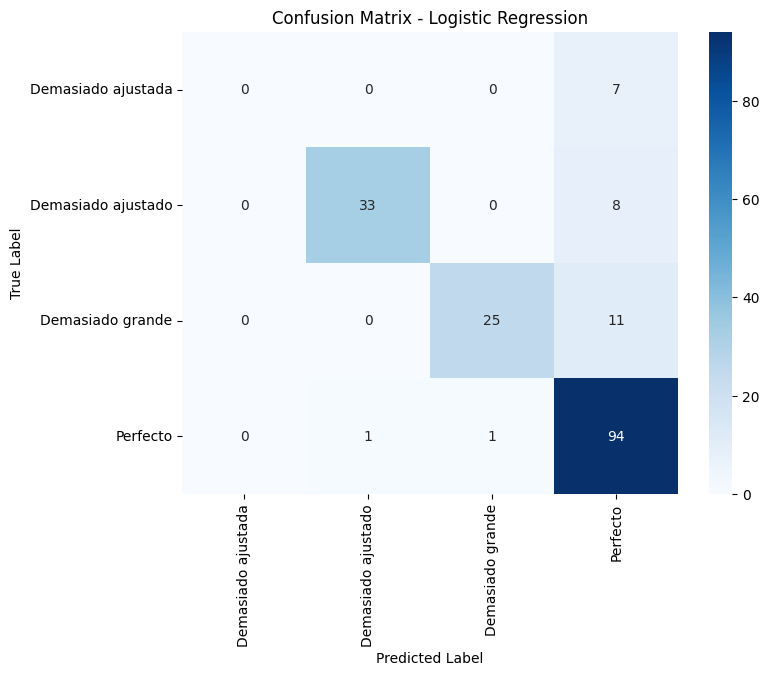

In [46]:
y_pred_lr = model_lr.predict(X_test)

print("\n--- Logistic Regression Performance ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_lr.classes_, yticklabels=model_lr.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


--- Random Forest Classifier Performance ---
Classification Report:
                    precision    recall  f1-score   support

Demasiado ajustada       1.00      1.00      1.00         7
Demasiado ajustado       0.97      0.90      0.94        41
  Demasiado grande       0.94      0.83      0.88        36
          Perfecto       0.90      0.97      0.93        96

          accuracy                           0.93       180
         macro avg       0.95      0.93      0.94       180
      weighted avg       0.93      0.93      0.93       180


Confusion Matrix:
[[ 7  0  0  0]
 [ 0 37  0  4]
 [ 0  0 30  6]
 [ 0  1  2 93]]


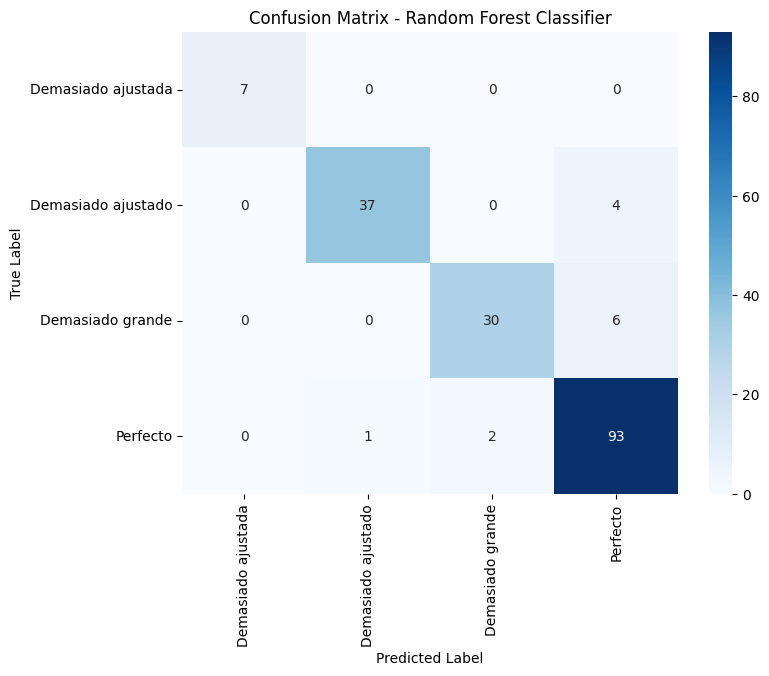

In [47]:
y_pred_rf = model_rf.predict(X_test)

print("\n--- Random Forest Classifier Performance ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

In [48]:
# Example of new data for prediction
new_data = pd.DataFrame({
    'Tipo_Prenda': ['Camiseta', 'Pantalón', 'Vestido'],
    'Marca': ['Zara', "Levi's", 'Mango'],
    'Medida_Pecho_cm': [112, pd.NA, 86],
    'Medida_Cintura_cm': [80, 90, 70],
    'Medida_Cadera_cm': [150, 105, 89],
    'Altura_cm': [150, 180, 163],
    'Peso_kg': [100, 80, 56],
    'Edad': [30, 35, 22],
    'Talla_Ropa_General': ['S', pd.NA,  "L"],
    'Talla_Zapatillas': [ pd.NA,  pd.NA,  pd.NA],
    'Talla_Pantalones': [ pd.NA, '34x34',  pd.NA]
})

print("\nNew data for prediction:")
print(new_data)

# Convert pd.NA to np.nan
new_data_processed = new_data.replace({pd.NA: np.nan})

# Predict using the Random Forest model (you can choose either model)
predictions_rf = model_rf.predict(new_data_processed)

print("\nPredictions for new data (Random Forest):")
print(predictions_rf)


New data for prediction:
  Tipo_Prenda   Marca Medida_Pecho_cm  Medida_Cintura_cm  Medida_Cadera_cm  \
0    Camiseta    Zara             112                 80               150   
1    Pantalón  Levi's            <NA>                 90               105   
2     Vestido   Mango              86                 70                89   

   Altura_cm  Peso_kg  Edad Talla_Ropa_General Talla_Zapatillas  \
0        150      100    30                  S             <NA>   
1        180       80    35               <NA>             <NA>   
2        163       56    22                  L             <NA>   

  Talla_Pantalones  
0             <NA>  
1            34x34  
2             <NA>  

Predictions for new data (Random Forest):
['Demasiado grande' 'Perfecto' 'Perfecto']


C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_13260\3483617787.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data_processed = new_data.replace({pd.NA: np.nan})
